In [22]:
using Gen
using LinearAlgebra
using StatsBase
using PyPlot
using Seaborn
using Base
include("generate_data.jl")
using .GenerateData

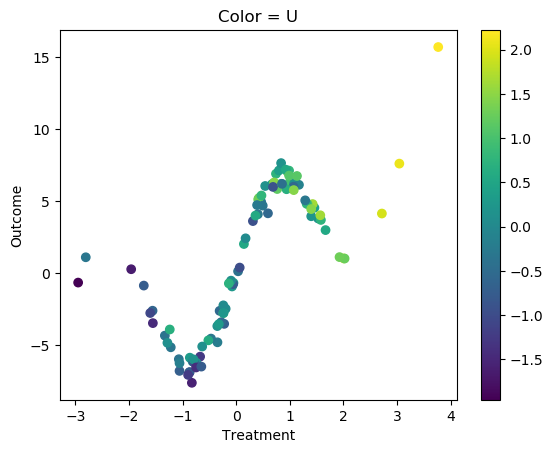

PyObject Text(24.000000000000007, 0.5, 'Outcome')

In [43]:
SigmaU, U, T, X, Y, epsY, causal = GenerateData.generate_synthetic("../config.toml")
scatter(T, Y, c=U)
colorbar()
title("Color = U")
xlabel("Treatment")
ylabel("Outcome")

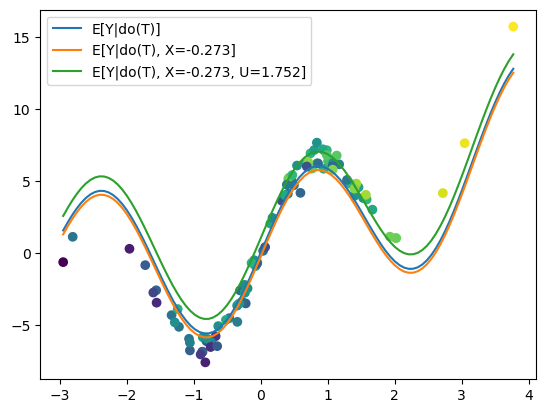

PyObject <matplotlib.legend.Legend object at 0x1a6460aad0>

In [44]:
ft = causal[1]
ftx = causal[2]
ftxu = causal[3]

T_ = collect(range(minimum(T),stop=maximum(T),length=100))
yt = ft(T_)
ytx = ftx(T_, fill.(X[1], 100))
ytxu = ftxu(T_, fill.(X[1], 100), fill.(U[1], 100))

scatter(T, Y, c=U)
plot(T_, yt, label="E[Y|do(T)]")
plot(T_, ytx, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * "]")

plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[2], digits=3)) *"]")
legend()